# Deep Learning (Spring 2021) - Homework 4

*Developed by Hongtau Wu & Suzanna Sia*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your final submission (a single zip file) should include your written report, this notebook (.ipynb file), and a PDF of this notebook.

## Problem 1a)

### Imports

In [32]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

import torch
import torch.nn as nn
import time

### Data Loading

In [34]:
## Spectify Path to Provided Data Here
DATA_PATH = 'DeepLearning_Spring2021_HW4_data.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]
X = data[:,0:2]
print("Y:", Y.shape)
print("X:", X.shape)

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Y: (60000,)
X: (60000, 2)


### Visualization Code

Do not touch any of the visualization code below.

In [35]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):
    """
    
    """
    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, True)
    polygon2 = Polygon(p1, True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):
    """
    
    """
    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

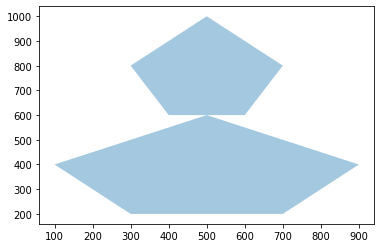

In [36]:
visualize_polygons(p0,p1)

### Problem 1a) 

Please fill in all code blocks marked with a #TODO.

In [39]:
def threshold_activation1(x):
    """
    
    """
    y = np.copy(x)
    y[y <= 0] = 0
    y[y > 0] = 1
    return y


def and_gate(x):
    """
    #TODO: Implement an "and" gate
    """
    # TODO:
    for item in x:
        if item == 0:
            return 0
    return 1

def or_gate(x):
    """
    #TODO: Implement an "or" gate
    """
    # TODO:
    for item in x:
        if item == 1:
            return 1
    return 0

def analytical_parameters(p0, p1):
    """
    
    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b 

def predict_output_v1(X, W, b):
    """
    
    """
    predictions = []
    for idx in range(data.shape[0]):  
        x = np.reshape(X[idx, :], (2, 1))        
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def predict_output_v2(X, W, b):
    """
    #TODO: Update usage of the gates in this function
    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Trhough Data Points
    for idx in range(data.shape[0]):  
        x = np.reshape(X[idx, :], (2, 1))        
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = and_gate([or_gate(input_to_final_gate), first_gate_output])
        predictions.append(prediction)
    return predictions

def calc_accuracy(true_y, pred_y):
    """
    
    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`

Accuracy:  1.0


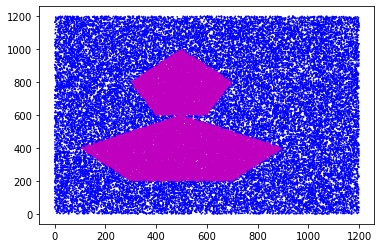

In [ ]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

In the code above, change the gates in `predict_output_v2()` such that only the points in the first_polygon [[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]] are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

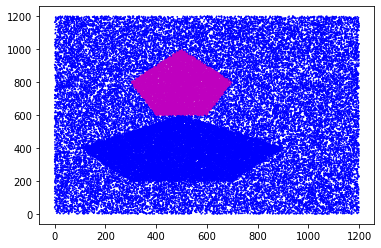

In [40]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

## Problem 1b-d)

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.

### Problem 1b)

In [26]:
################################################################################
# Problem 1b)                                #
################################################################################
class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        
        # FeedForward Layers
        self.ff1 = nn.Linear(input_size, 10)  # Input
        self.ff2 = nn.Linear(10, 2)   # Hidden Layer
        self.ff_out = nn.Linear(2, 1)  

        # Activations
        self.sigmoid = nn.Sigmoid()

        # Weight Initialization
        torch.nn.init.xavier_uniform_(self.ff1.weight.data)
        torch.nn.init.xavier_uniform_(self.ff2.weight.data)
        torch.nn.init.xavier_uniform_(self.ff_out.weight.data)

    def forward(self, input_data):
        out = self.sigmoid(self.ff1(input_data))
        out = self.sigmoid(self.ff2(out))
        out = self.sigmoid(self.ff_out(out))
        # out = self.ff_out(out)
        return out

In [27]:
# Split of training set and testing set
N = 50000
xtrain = data[:N, 0:2]
ytrain = data[:N, 2]
xtest = data[N:, 0:2]
ytest = data[N:, 2]

xtrain = torch.Tensor(xtrain)
ytrain = torch.Tensor(ytrain)
xtest = torch.Tensor(xtest)
ytest = torch.Tensor(ytest)

# Data Normalizaiton
train_mean = xtrain.mean()
train_std = xtrain.std()

xtrain = xtrain - train_mean
xtrain = xtrain / train_std

xtest = xtest - train_mean
xtest = xtest / train_std

# Data loaders
train = torch.utils.data.TensorDataset(xtrain, ytrain)
test = torch.utils.data.TensorDataset(xtest, ytest)

train_loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)

In [32]:
# Evaluation of Accuracy, Loss, etc.
def evaluate(dataloader, verbose=1):
    correct = 0
    total = 0
    loss_sum = 0
    for images, labels in dataloader:
      if gpu_boole:
            images, labels = images.cuda(), labels.cuda()
      images = images.view(-1, 2)
      labels = labels.view(-1, 1)
      outputs = net(images)
      # Prediction should choose the index of the max element in the outputs as the index
      preds = torch.round(outputs.data)
      total += labels.size(0)
      correct += (labels.float() == preds.float()).sum()
      loss_sum += loss_metric(outputs, labels)
    acc = 100.0 * correct / total
    loss = loss_sum.cpu().data.numpy().item() / total
    if verbose:
      if dataloader == train_loader:
        print('Train Accuracy: %f %%' % acc)
        print('Train loss: %f' % loss)
      elif dataloader == test_loader:
        print('Test Accuracy: %f %%' % acc)
        print('Test loss: %f' % loss)
    return acc, loss

def train(net, optimizer, loss, epochs=500, train_dataloader=train_loader, test_dataloader=test_loader, **kwargs):
    # TODO: Implement a training loop
    # Defining batch train loss recording arrays for later visualization/plotting:
    loss_batch_store = []
    
    train_acc_store = []
    train_loss_store = []
    test_acc_store = []
    test_loss_store = []
    print("Starting training...")
    print()
    for epoch in range(epochs):
      if epoch % 10 == 0:
        verbose = 1
        print("Epoch:", epoch+1, "running...")
      else:
        verbose = 0
      # Training
      for i, (images, labels) in enumerate(train_loader):
        if gpu_boole:
          images = images.cuda()
          labels = labels.cuda()
        images = images.view(-1,2)
        labels = labels.view(-1,1)
        if i > 0 or epoch > 0:
          optimizer.zero_grad()
        outputs = net(images)
        loss = loss_metric(outputs, labels)
        loss.backward()
        if i > 0 or epoch > 0:
          loss_batch_store.append(loss.cpu().data.numpy().item())         
        optimizer.step()
      train_acc, train_loss = evaluate(dataloader=train_loader, verbose=verbose)
      train_acc_store.append(train_acc)
      train_loss_store.append(train_loss)
      # Testing
      test_acc, test_loss = evaluate(dataloader=test_loader, verbose=verbose)
      test_acc_store.append(test_acc)
      test_loss_store.append(test_loss)
      print()
    print("Training ends.")
    print()

    # Plotting epoch-wise train loss curve:
    plt.plot(train_loss_store, '-o', label = 'train_loss', color = 'blue')
    plt.xlabel('Epoch Number')
    plt.ylabel('Sample-wise Loss At Last epoch')
    plt.legend()
    plt.show()
    # Plotting epoch-wise test accuracy curve:
    plt.plot(test_acc_store, '-o', label = 'test_acc', color = 'orange')
    plt.xlabel('Epoch Number')
    plt.ylabel('Sample-wise Accuracy At Last epoch')
    plt.legend()
    plt.show()

Starting training...

Epoch: 1 running...
Train Accuracy: 67.265999 %
Train loss: 0.006848
Test Accuracy: 67.449997 %
Test loss: 0.006848










Epoch: 11 running...
Train Accuracy: 85.669998 %
Train loss: 0.003844
Test Accuracy: 86.509995 %
Test loss: 0.003722










Epoch: 21 running...
Train Accuracy: 88.353996 %
Train loss: 0.003000
Test Accuracy: 89.279999 %
Test loss: 0.002846










Epoch: 31 running...
Train Accuracy: 94.180000 %
Train loss: 0.001862
Test Accuracy: 94.949997 %
Test loss: 0.001708










Epoch: 41 running...
Train Accuracy: 94.399994 %
Train loss: 0.001677
Test Accuracy: 95.059998 %
Test loss: 0.001526










Epoch: 51 running...
Train Accuracy: 94.521996 %
Train loss: 0.001608
Test Accuracy: 95.279999 %
Test loss: 0.001459










Epoch: 61 running...
Train Accuracy: 94.579994 %
Train loss: 0.001548
Test Accuracy: 95.320000 %
Test loss: 0.001400










Epoch: 71 running...
Train Accuracy: 94.843994 %
Train loss: 0.001443
Test Accuracy: 95.57

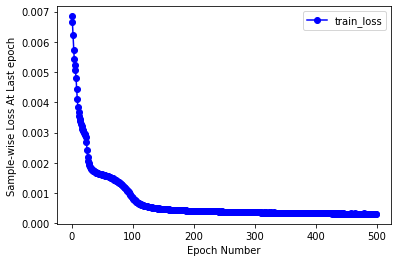

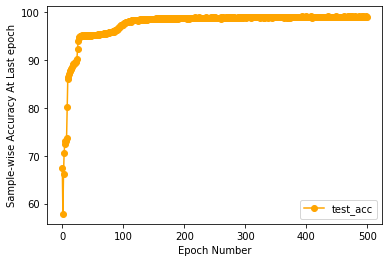

In [37]:
gpu_boole = torch.cuda.is_available()

# Set seed for pseudo-randomness
seeds = time.time()
torch.manual_seed(seeds)

net = Net(input_size=2)
if gpu_boole:
  net = net.cuda()

optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_metric = nn.BCELoss()

train(net=net, optimizer=optimizer, loss=loss_metric, epochs=500)

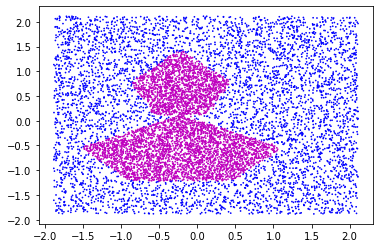

In [53]:
# Visualization
# Make Predictions
xtest = xtest.cuda()
pred_y = net(xtest)
pred_y = torch.round(pred_y.data)

pred_y = pred_y.cpu().detach().numpy()
p = []
for i in pred_y:
  if i == 1:
    p.append(1)
  else:
    p.append(0)

# Visualize Predictions
visualize_datapoints(xtest.cpu(), np.array(p))

### Problem 1c)

In [38]:
################################################################################
# Problem 1c)                                #
################################################################################
class NetC(nn.Module):
    def __init__(self, input_size):
        super(NetC, self).__init__()
        
        # FeedForward Layers
        self.ff1 = nn.Linear(input_size, 50)  # Input
        self.ff2 = nn.Linear(50, 20)   # Hidden Layer
        self.ff3 = nn.Linear(20, 5)
        self.ff_out = nn.Linear(5, 1)  

        # Activations
        self.sigmoid = nn.Sigmoid()

        # Weight Initialization
        torch.nn.init.xavier_uniform_(self.ff1.weight.data)
        torch.nn.init.xavier_uniform_(self.ff2.weight.data)
        torch.nn.init.xavier_uniform_(self.ff3.weight.data)
        torch.nn.init.xavier_uniform_(self.ff_out.weight.data)

    def forward(self, input_data):
        out = self.sigmoid(self.ff1(input_data))
        out = self.sigmoid(self.ff2(out))
        out = self.sigmoid(self.ff3(out))
        out = self.sigmoid(self.ff_out(out))
        # out = self.ff_out(out)
        return out

In [39]:
# Split of training set and testing set
N = 50000
xtrain = data[:N, 0:2]
ytrain = data[:N, 2]
xtest = data[N:, 0:2]
ytest = data[N:, 2]

xtrain = torch.Tensor(xtrain)
ytrain = torch.Tensor(ytrain)
xtest = torch.Tensor(xtest)
ytest = torch.Tensor(ytest)

# Data Normalizaiton
train_mean = xtrain.mean()
train_std = xtrain.std()

xtrain = xtrain - train_mean
xtrain = xtrain / train_std

xtest = xtest - train_mean
xtest = xtest / train_std

# Data loaders
train = torch.utils.data.TensorDataset(xtrain, ytrain)
test = torch.utils.data.TensorDataset(xtest, ytest)

train_loader = torch.utils.data.DataLoader(train, batch_size=100, shuffle=False)
test_loader = torch.utils.data.DataLoader(test, batch_size=100, shuffle=False)

In [40]:
# Evaluation of Accuracy, Loss, etc.
def evaluate(dataloader, verbose=1):
    correct = 0
    total = 0
    loss_sum = 0
    for images, labels in dataloader:
      if gpu_boole:
            images, labels = images.cuda(), labels.cuda()
      images = images.view(-1, 2)
      labels = labels.view(-1, 1)
      outputs = net(images)
      # Prediction should choose the index of the max element in the outputs as the index
      preds = torch.round(outputs.data)
      total += labels.size(0)
      correct += (labels.float() == preds.float()).sum()
      loss_sum += loss_metric(outputs, labels)
    acc = 100.0 * correct / total
    loss = loss_sum.cpu().data.numpy().item() / total
    if verbose:
      if dataloader == train_loader:
        print('Train Accuracy: %f %%' % acc)
        print('Train loss: %f' % loss)
      elif dataloader == test_loader:
        print('Test Accuracy: %f %%' % acc)
        print('Test loss: %f' % loss)
    return acc, loss

def train(net, optimizer, loss, epochs=500, train_dataloader=train_loader, test_dataloader=test_loader, **kwargs):
    # TODO: Implement a training loop
    # Defining batch train loss recording arrays for later visualization/plotting:
    loss_batch_store = []
    
    train_acc_store = []
    train_loss_store = []
    test_acc_store = []
    test_loss_store = []
    print("Starting training...")
    print()
    for epoch in range(epochs):
      if epoch % 10 == 0:
        verbose = 1
        print("Epoch:", epoch+1, "running...")
      else:
        verbose = 0
      # Training
      for i, (images, labels) in enumerate(train_loader):
        if gpu_boole:
          images = images.cuda()
          labels = labels.cuda()
        images = images.view(-1,2)
        labels = labels.view(-1,1)
        if i > 0 or epoch > 0:
          optimizer.zero_grad()
        outputs = net(images)
        loss = loss_metric(outputs, labels)
        loss.backward()
        if i > 0 or epoch > 0:
          loss_batch_store.append(loss.cpu().data.numpy().item())         
        optimizer.step()
      train_acc, train_loss = evaluate(dataloader=train_loader, verbose=verbose)
      train_acc_store.append(train_acc)
      train_loss_store.append(train_loss)
      # Testing
      test_acc, test_loss = evaluate(dataloader=test_loader, verbose=verbose)
      test_acc_store.append(test_acc)
      test_loss_store.append(test_loss)
      print()
    print("Training ends.")
    print()

    # Plotting epoch-wise train loss curve:
    plt.plot(train_loss_store, '-o', label = 'train_loss', color = 'blue')
    plt.xlabel('Epoch Number')
    plt.ylabel('Sample-wise Loss At Last epoch')
    plt.legend()
    plt.show()
    # Plotting epoch-wise test accuracy curve:
    plt.plot(test_acc_store, '-o', label = 'test_acc', color = 'orange')
    plt.xlabel('Epoch Number')
    plt.ylabel('Sample-wise Accuracy At Last epoch')
    plt.legend()
    plt.show()

Starting training...

Epoch: 1 running...
Train Accuracy: 52.079998 %
Train loss: 0.006919
Test Accuracy: 51.750000 %
Test loss: 0.006919










Epoch: 11 running...
Train Accuracy: 72.942001 %
Train loss: 0.004771
Test Accuracy: 73.479996 %
Test loss: 0.004715










Epoch: 21 running...
Train Accuracy: 86.479996 %
Train loss: 0.003303
Test Accuracy: 87.559998 %
Test loss: 0.003145










Epoch: 31 running...
Train Accuracy: 88.417999 %
Train loss: 0.002694
Test Accuracy: 89.430000 %
Test loss: 0.002537










Epoch: 41 running...
Train Accuracy: 94.362000 %
Train loss: 0.001667
Test Accuracy: 95.139999 %
Test loss: 0.001525










Epoch: 51 running...
Train Accuracy: 95.103996 %
Train loss: 0.001397
Test Accuracy: 95.699997 %
Test loss: 0.001272










Epoch: 61 running...
Train Accuracy: 96.711998 %
Train loss: 0.000994
Test Accuracy: 97.089996 %
Test loss: 0.000909










Epoch: 71 running...
Train Accuracy: 97.973999 %
Train loss: 0.000641
Test Accuracy: 98.18

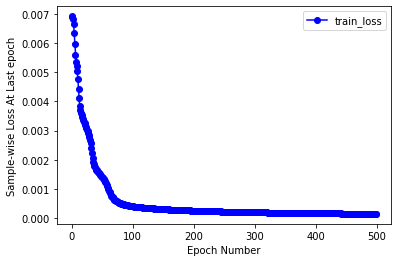

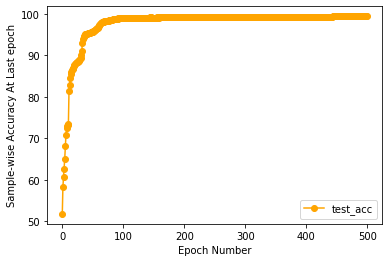

In [45]:
gpu_boole = torch.cuda.is_available()

# Set seed for pseudo-randomness
seeds = time.time()
torch.manual_seed(seeds)

net = NetC(input_size=2)
if gpu_boole:
  net = net.cuda()

optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
loss_metric = nn.BCELoss()

train(net=net, optimizer=optimizer, loss=loss_metric, epochs=500)

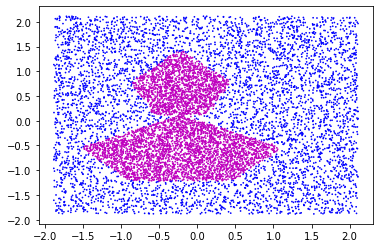

In [52]:
# Visualization
# Make Predictions
xtest = xtest.cuda()
pred_y = net(xtest)
pred_y = torch.round(pred_y.data)

pred_y = pred_y.cpu().detach().numpy()
p = []
for i in pred_y:
  if i == 1:
    p.append(1)
  else:
    p.append(0)

# Visualize Predictions
visualize_datapoints(xtest.cpu(), np.array(p))

### Problem 1d)
Please see the corresponding part in the report.

## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [4]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST
from torch.utils.data import SubsetRandomSampler

import torch.nn.functional as F
import matplotlib.pyplot as plt

### Data Loading

In [3]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

################################################################################
# Problem 2a)                                #
################################################################################
#   There is a total of 60000 examples in the training set (we 
# divide into 50000 for training and 10000 for validation) and a 
# total of 10000 examples in the testing set.
# 
#   Each example of FashionMNIST is a 28*28 grayscale image, 
# associated with a label from 10 possible classes.
#   
#   Input: 28*28 (every pixel out of (0, 1))
#   Output: 1 (out of 10)
################################################################################


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Problem 2a)

### Design Model

In [4]:
class CNNet(nn.Module):
    def __init__(self):
        # Inherent Torch Module
        super(CNNet, self).__init__()
        # TODO: Initialize Model Layers
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 160)
        self.fc2 = nn.Linear(160, 40)
        self.fc3 = nn.Linear(40, 10)

    def forward(self, x):
        ##TODO: Setup Forward Pass
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

### Model Training

In [5]:
# Evaluation of Accuracy, Loss, etc.
def evaluate(dataloader, verbose=1):
    correct = 0
    total = 0
    loss_sum = 0
    for images, labels in dataloader:
      outputs = model(images)
      # Prediction should choose the index of the max element in the outputs as the index
      preds = torch.argmax(outputs, dim=1)
      total += labels.size(0)
      correct += (labels.float() == preds.float()).sum()
      loss_sum += loss_f(outputs, labels)
    acc = 100.0 * correct / total
    loss = loss_sum.cpu().data.numpy().item() / total
    if verbose:
      if dataloader == train_dataloader:
        print('Train Accuracy: %f %%' % acc)
        print('Train loss: %f' % loss)
      elif dataloader == test_dataloader:
        print('Test Accuracy: %f %%' % acc)
        print('Test loss: %f' % loss)
      elif dataloader == val_dataloader:
        print('Validation Accuracy: %f %%' % acc)
        print('Validation loss: %f' % loss)
    return acc, loss

def train(model, optimizer, loss, lr, epochs=50, train_dataloader=train_dataloader, val_dataloader=val_dataloader, test_dataloader=test_dataloader, **kwargs):
    # TODO: Implement a training loop
    # Defining batch train loss recording arrays for later visualization/plotting:
    loss_batch_store = []
    
    train_acc_store = []
    train_loss_store = []
    val_acc_store = []
    val_loss_store = []
    test_acc_store = []
    test_loss_store = []
    print("Starting training...")
    print()
    for epoch in range(epochs):
      print("Epoch:", epoch+1, "running...")
      # Training
      for i, (images, labels) in enumerate(train_dataloader):
        if i > 0 or epoch > 0:
          optimizer.zero_grad()
        outputs = model(images)
        loss = loss_f(outputs, labels)
        loss.backward()
        if i > 0 or epoch > 0:
          loss_batch_store.append(loss.cpu().data.numpy().item())         
        optimizer.step()
      train_acc, train_loss = evaluate(dataloader=train_dataloader, verbose=1)
      train_acc_store.append(train_acc)
      train_loss_store.append(train_loss)
      # Validation
      val_acc, val_loss = evaluate(dataloader=val_dataloader, verbose=1)
      val_acc_store.append(val_acc)
      val_loss_store.append(val_loss)
      # Testing
      test_acc, test_loss = evaluate(dataloader=test_dataloader, verbose=1)
      test_acc_store.append(test_acc)
      test_loss_store.append(test_loss)
      print()
    print("Training ends.")
    print()

    # Plotting epoch-wise train loss curve:
    plt.plot(train_loss_store, '-o', label = 'train_loss', color = 'blue')
    plt.xlabel('Epoch Number')
    plt.ylabel('Sample-wise Loss At Last epoch')
    plt.legend()
    plt.show()
    # Plotting epoch-wise validation accuracy curve:
    plt.plot(val_acc_store, '-o', label = 'var_acc', color = 'orange')
    plt.xlabel('Epoch Number')
    plt.ylabel('Sample-wise Accuracy At Last epoch')
    plt.legend()
    plt.show()
    # Plotting epoch-wise test accuracy curve:
    plt.plot(test_acc_store, '-o', label = 'test_acc', color = 'orange')
    plt.xlabel('Epoch Number')
    plt.ylabel('Sample-wise Accuracy At Last epoch')
    plt.legend()
    plt.show()

Starting training...

Epoch: 1 running...
Train Accuracy: 66.823997 %
Train loss: 0.017890
Validation Accuracy: 66.940002 %
Validation loss: 0.017701
Test Accuracy: 66.230003 %
Test loss: 0.912164

Epoch: 2 running...
Train Accuracy: 73.248001 %
Train loss: 0.014229
Validation Accuracy: 73.339996 %
Validation loss: 0.014214
Test Accuracy: 72.699997 %
Test loss: 0.737064

Epoch: 3 running...
Train Accuracy: 75.379997 %
Train loss: 0.013067
Validation Accuracy: 75.459999 %
Validation loss: 0.013234
Test Accuracy: 74.120003 %
Test loss: 0.683392

Epoch: 4 running...
Train Accuracy: 78.316002 %
Train loss: 0.011392
Validation Accuracy: 78.040001 %
Validation loss: 0.011541
Test Accuracy: 77.489998 %
Test loss: 0.597023

Epoch: 5 running...
Train Accuracy: 80.702003 %
Train loss: 0.010588
Validation Accuracy: 80.150002 %
Validation loss: 0.010801
Test Accuracy: 79.440002 %
Test loss: 0.563718

Epoch: 6 running...
Train Accuracy: 81.477997 %
Train loss: 0.010096
Validation Accuracy: 81.41999

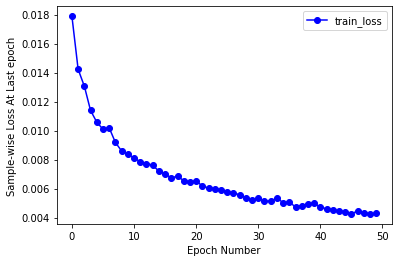

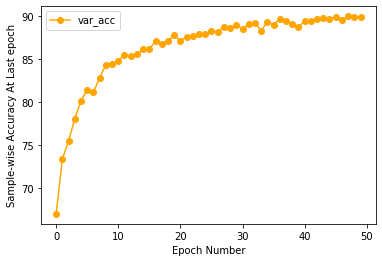

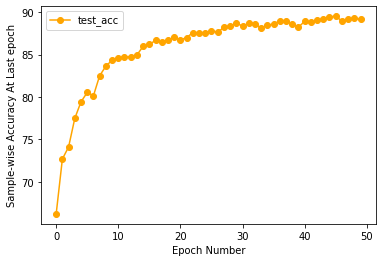

In [8]:
# Hyperparameters
EPOCHS = 50
# TODO: Choose a Learning Rate
LR = 0.01 
# Setting up the model, optimizer, and loss function
model = CNNet()
# TODO: Choose an optimized
optimizer = torch.optim.SGD(model.parameters(), lr = LR)
# TODO: Choose a loss
loss_f = nn.NLLLoss()

# Run Training Loop
train(model=model, optimizer=optimizer, loss=loss_f, lr=LR, epochs=EPOCHS)

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [5]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
#TODO: Use the same from above or consider alternatives
transforms = tfs.Compose([tfs.ToTensor()]) 

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

### Model Design

In [28]:
# TODO: Try to improve upon your previous architecture
class CNNet_2(nn.Module):
    def __init__(self):
        # Inherent Torch Module
        super(CNNet_2, self).__init__()
        # TODO: Initialize Model Layers
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 160)
        self.fc2 = nn.Linear(160, 40)
        self.fc3 = nn.Linear(40, 10)

    def forward(self, x):
        # TODO: Setup Forward Pass
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

### Model Training

In [29]:
# TODO: Fit and evaluate your model. What do you observe?
# Evaluation of Accuracy, Loss, etc.
def evaluate(dataloader, verbose=1):
    correct = 0
    total = 0
    loss_sum = 0
    for images, labels in dataloader:
      outputs = model(images)
      # Prediction should choose the index of the max element in the outputs as the index
      preds = torch.argmax(outputs, dim=1)
      total += labels.size(0)
      correct += (labels.float() == preds.float()).sum()
      loss_sum += loss_f(outputs, labels)
    acc = 100.0 * correct / total
    loss = loss_sum.cpu().data.numpy().item() / total
    if verbose:
      if dataloader == train_dataloader:
        print('Train Accuracy: %f %%' % acc)
        print('Train loss: %f' % loss)
      elif dataloader == test_dataloader:
        print('Test Accuracy: %f %%' % acc)
        print('Test loss: %f' % loss)
      elif dataloader == val_dataloader:
        print('Validation Accuracy: %f %%' % acc)
        print('Validation loss: %f' % loss)
    return acc, loss

def train(model, optimizer, loss, lr, epochs=50, train_dataloader=train_dataloader, val_dataloader=val_dataloader, test_dataloader=test_dataloader, **kwargs):
    # TODO: Implement a training loop
    # Defining batch train loss recording arrays for later visualization/plotting:
    loss_batch_store = []
    
    train_acc_store = []
    train_loss_store = []
    val_acc_store = []
    val_loss_store = []
    test_acc_store = []
    test_loss_store = []
    print("Starting training...")
    print()
    for epoch in range(epochs):
      print("Epoch:", epoch+1, "running...")
      # Training
      for i, (images, labels) in enumerate(train_dataloader):
        if i > 0 or epoch > 0:
          optimizer.zero_grad()
        outputs = model(images)
        loss = loss_f(outputs, labels)
        loss.backward()
        if i > 0 or epoch > 0:
          loss_batch_store.append(loss.cpu().data.numpy().item())         
        optimizer.step()
      train_acc, train_loss = evaluate(dataloader=train_dataloader, verbose=1)
      train_acc_store.append(train_acc)
      train_loss_store.append(train_loss)
      # Validation
      val_acc, val_loss = evaluate(dataloader=val_dataloader, verbose=1)
      val_acc_store.append(val_acc)
      val_loss_store.append(val_loss)
      # Testing
      test_acc, test_loss = evaluate(dataloader=test_dataloader, verbose=1)
      test_acc_store.append(test_acc)
      test_loss_store.append(test_loss)
      print()
    print("Training ends.")
    print()

    # Plotting epoch-wise train loss curve:
    plt.plot(train_loss_store, '-o', label = 'train_loss', color = 'blue')
    plt.xlabel('Epoch Number')
    plt.ylabel('Sample-wise Loss At Last epoch')
    plt.legend()
    plt.show()
    # Plotting epoch-wise validation accuracy curve:
    plt.plot(val_acc_store, '-o', label = 'var_acc', color = 'orange')
    plt.xlabel('Epoch Number')
    plt.ylabel('Sample-wise Accuracy At Last epoch')
    plt.legend()
    plt.show()
    # Plotting epoch-wise test accuracy curve:
    plt.plot(test_acc_store, '-o', label = 'test_acc', color = 'orange')
    plt.xlabel('Epoch Number')
    plt.ylabel('Sample-wise Accuracy At Last epoch')
    plt.legend()
    plt.show()

Starting training...

Epoch: 1 running...
Train Accuracy: 70.811996 %
Train loss: 0.014996
Validation Accuracy: 70.110001 %
Validation loss: 0.015330
Test Accuracy: 69.900002 %
Test loss: 0.776981

Epoch: 2 running...
Train Accuracy: 78.220001 %
Train loss: 0.012153
Validation Accuracy: 78.269997 %
Validation loss: 0.012350
Test Accuracy: 78.029999 %
Test loss: 0.628730

Epoch: 3 running...
Train Accuracy: 78.823997 %
Train loss: 0.011622
Validation Accuracy: 77.889999 %
Validation loss: 0.011850
Test Accuracy: 77.669998 %
Test loss: 0.602476

Epoch: 4 running...
Train Accuracy: 82.103996 %
Train loss: 0.010468
Validation Accuracy: 81.720001 %
Validation loss: 0.010709
Test Accuracy: 81.459999 %
Test loss: 0.540849

Epoch: 5 running...
Train Accuracy: 83.748001 %
Train loss: 0.009306
Validation Accuracy: 83.269997 %
Validation loss: 0.009587
Test Accuracy: 83.339996 %
Test loss: 0.496866

Epoch: 6 running...
Train Accuracy: 84.870003 %
Train loss: 0.008743
Validation Accuracy: 84.09999

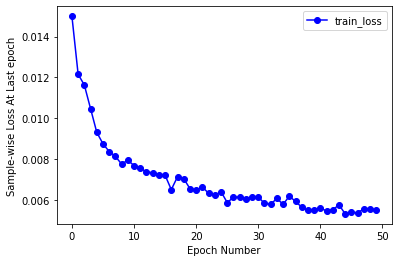

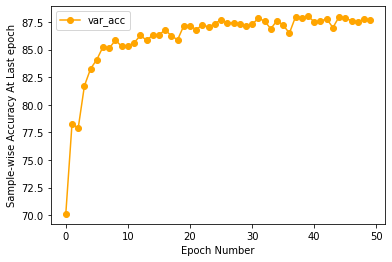

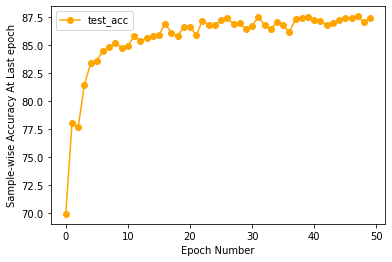

In [13]:
# Hyperparameters
EPOCHS = 50
# TODO: Choose a Learning Rate
LR = 0.01 
# Setting up the model, optimizer, and loss function
model = CNNet_2()
# TODO: Choose an optimized
optimizer = torch.optim.SGD(model.parameters(), lr = LR, momentum = 0.9, weight_decay = 0.00001, dampening = 0.000002, nesterov = False)
# TODO: Choose a loss
loss_f = nn.NLLLoss()

# Run Training Loop
train(model=model, optimizer=optimizer, loss=loss_f, lr=LR, epochs=EPOCHS)

## Problem 2c)

Write down your response in the final report.